## Importing Packages 

In [31]:
#import packages 
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Dataframe of 5 Countries 

In [34]:
#Dictionary of Dataframes 
data = {}
data["afg"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv")
data["mmr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mmr--age--gender--year.csv")
data["sdn"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
data["ukr"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ukr--age--gender--year.csv")
data["yem"] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

#Map Abbreviations 
country_name_map = {
    "afg": "Afghanistan",
    "mmr": "Myanmar",
    "sdn": "Sudan",
    "ukr": "Ukraine",
    "yem": "Yemen"
}

df = pd.concat([data["afg"], data["mmr"], data["sdn"], data["ukr"], data["yem"]], ignore_index=True)


## Part 1: Matplotlib 

### 1. Create a line plot comparing total population over time

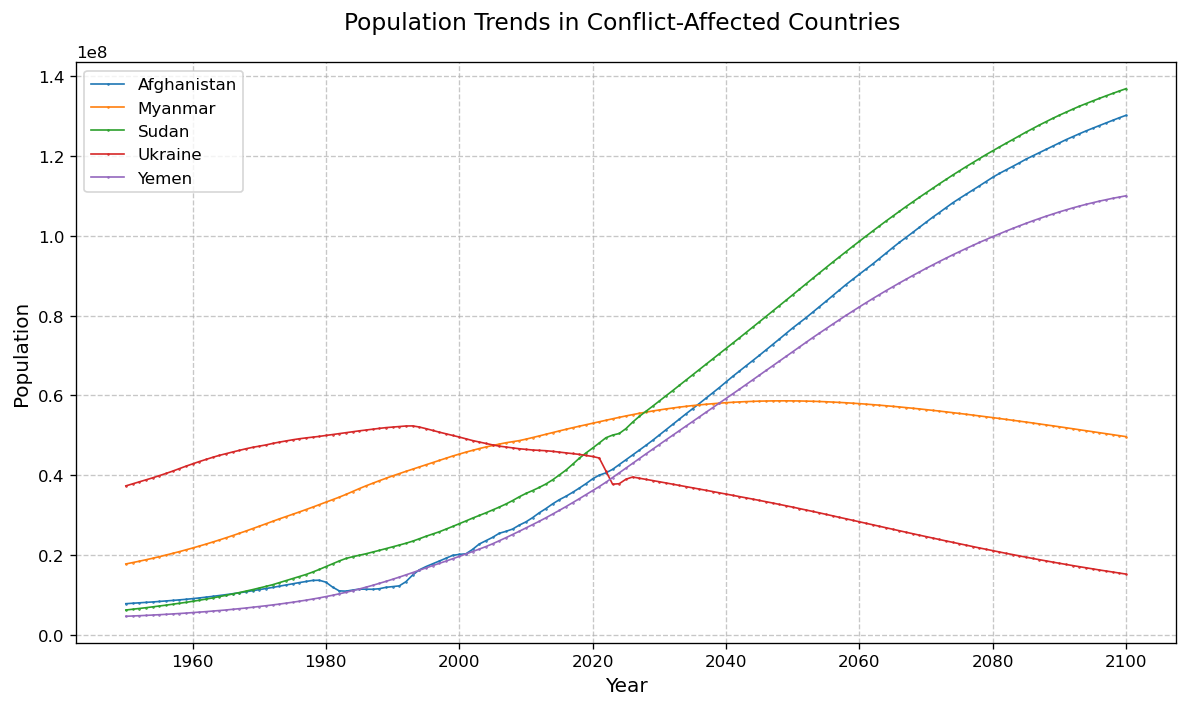

In [71]:
#Aggregate country populations
population_country_year = df.groupby(['country','year'])['population'].sum().reset_index()

#Create figure and axis 
plt.figure(figsize=(10,6),dpi=120)

#Create line plot 
for country in population_country_year['country'].unique():
    country_data = population_country_year[population_country_year['country'] == country]
    plt.plot(
        country_data['year'],
        country_data['population'],
        marker='o', 
        linestyle= '-' , 
        linewidth=1,
        markersize=0.5,
        label=country_name_map[country])

# Customize the plot
plt.title('Population Trends in Conflict-Affected Countries ', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


## Investigate demographic shifts using a stacked bar chart

/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_68230/734453367.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=True)
/var/folders/63/klpq6sss15lb697997qxym8m0000gn/T/ipykernel_68230/734453367.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack().fillna(0)


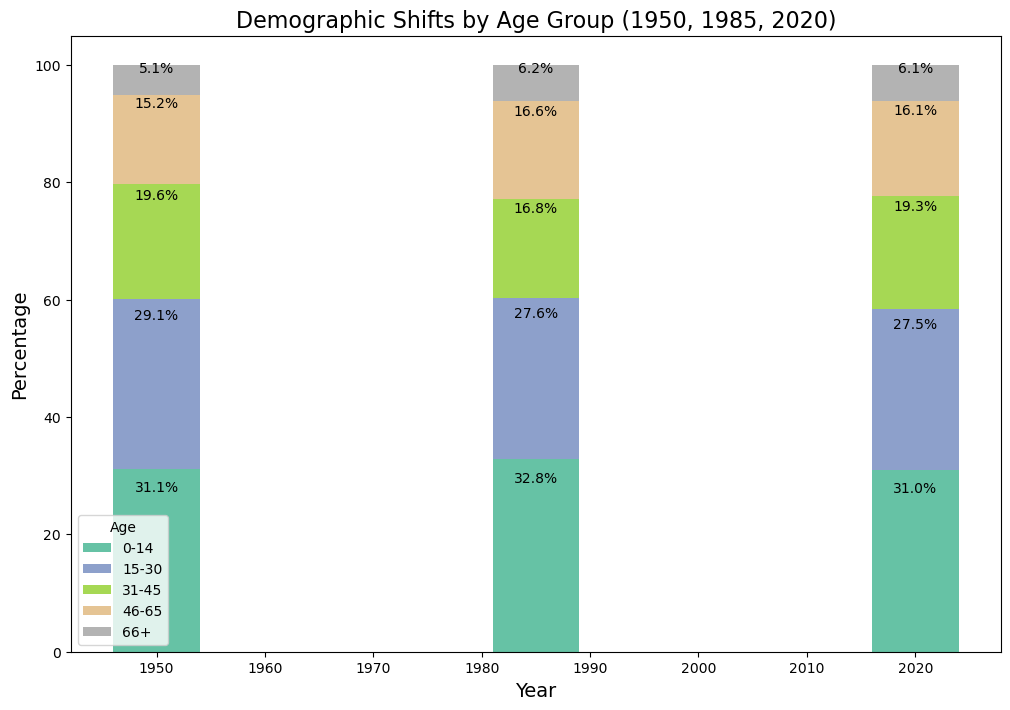

In [74]:

# Define age bins and corresponding labels
age_bins = [0, 14, 30, 45, 65, 150]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Filter data by years 1950, 1985, and 2020
years_of_interest = [1950, 1985, 2020]
df_filtered = df[df['year'].isin(years_of_interest)]

# Create an 'age_group' column by binning the 'age' column
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=True)

# Group data by year and age group, summing the population for each group
grouped_data = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack().fillna(0)

# Calculate percentage for each age group
grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot with Set2 colormap
fig, ax = plt.subplots(figsize=(12, 8))  # Larger figure size for thicker bars
colors = plt.cm.Set2(np.linspace(0, 1, len(age_labels)))
bar_width = 8.0  

# Iterate over the age groups and plot each as a bar
bottom = np.zeros(len(grouped_percentage))
for idx, age_group in enumerate(grouped_percentage.columns):
    ax.bar(grouped_percentage.index, grouped_percentage[age_group], 
           width=bar_width, bottom=bottom, color=colors[idx], label=age_group)
    bottom += grouped_percentage[age_group]

# Add text annotations for percentages closer to the bars
for year_idx, row in grouped_percentage.iterrows():
    cumulative = 0
    for age_group, value in row.items():
        if value > 5: 
            ax.text(year_idx, cumulative + value - (value * 0.1), 
                    f'{value:.1f}%', ha='center', va='center', fontsize=10, color='black')
        cumulative += value

# Add labels, title, and legend
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Demographic Shifts by Age Group (1950, 1985, 2020)', fontsize=16)
ax.legend(title='Age')
